In [24]:
from heatgeo.embedding import HeatGeo
import sys
sys.path.append('../../src')
# from heatgeo.other_emb import DiffusionMap
from other_methods import DiffusionMap
import numpy as np
import scprep
import scanpy as sc
from plotly3d.plot import scatter
import pathlib

In [12]:
# adata = sc.read('../../data/old/eb_hv.h5ad', backed='r')

In [13]:
data = np.load('../../data/eb_subset_all.npz')
X = data['data']
label = data['colors']

In [14]:
# X = adata.obsm['X_pca']
# labels = adata.obs['sample_labels']

In [15]:
dm = DiffusionMap()
emb = dm.fit_transform(X)
print(emb.shape) # (100, 2)

(3000, 2)


In [16]:
scatter(emb, label)

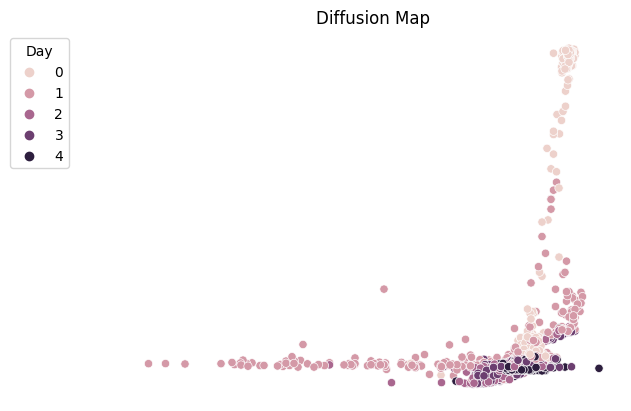

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=label, ax=ax)
ax.set_title('Diffusion Map')
ax.axis("off")
ax.legend(title="Day", bbox_to_anchor=(-0.1, 1.0))

In [17]:
dm.metric_computation(X)

In [18]:
dm.dist

array([[0.        , 0.24118991, 0.22224781, ..., 0.37832843, 0.24538278,
        0.26200085],
       [0.24118991, 0.        , 0.21679609, ..., 0.37677457, 0.24257082,
        0.25925087],
       [0.22224781, 0.21679609, 0.        , ..., 0.36722547, 0.22768703,
        0.24537383],
       ...,
       [0.37832843, 0.37677457, 0.36722547, ..., 0.        , 0.37888267,
        0.3895935 ],
       [0.24538278, 0.24257082, 0.22768703, ..., 0.37888267, 0.        ,
        0.26230567],
       [0.26200085, 0.25925087, 0.24537383, ..., 0.3895935 , 0.26230567,
        0.        ]])

In [19]:
is_train = data['is_train']
dm_train = DiffusionMap()
emb_train = dm_train.fit_transform(X[is_train])

In [21]:
dm_train.metric_computation(X[is_train])

In [25]:
datapath = '../../data/other_dist/'
pathlib.Path(datapath).mkdir(parents=True, exist_ok=True)

is_train = data['is_train']
phate = emb
dists_all = dm.dist
dists = dists_all.copy()
dists_train = dm_train.dist
dists[is_train][:,is_train] = dists_train
data_dict = dict(
    data=data['data'],
    phate=phate,
    colors=data['colors'],
    is_train=is_train,
    dist=dists,
    dist_all=dists_all,
)
np.savez(f'{datapath}/EB_DiffusionMap.npz', **data_dict)